In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# MOOC Econometrics

## Test Exercise 1

### Notes:

- See website for how to submit your answers and how feedback is organized.
- This exercise uses the datafile TestExer1 and requires a computer.
- The dataset TestExer1 is available on the website.


### Goals and skills being used:

- Get hands-on experience with performing simple regressions.
- Get feeling for consequences of violations of regression assumptions.
- Obtain some experience with how to diagnose that an assumption is violated.

### Questions

This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression.
In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates
assumptions A3 and A4, which state that all error terms $\varepsilon_i$ are drawn from one and the same distribution with
mean zero and fixed variance $\sigma^2$. The dataset contains twenty weekly observations on sales and advertising of a
department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks
was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the
analysis.

In [2]:
data = pd.read_csv('TestExer1-sales-round1.txt', sep='\t')
data.columns = ['obs', 'adv', 'sales']
data.head()

,obs,adv,sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


**(a)** Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you
expect to find if you would fit a regression line to these data?

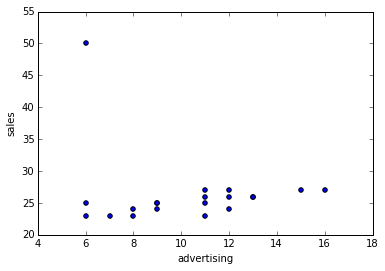

In [3]:
plt.scatter(x=data.adv, y=data.sales)
plt.ylabel('sales')
plt.xlabel('advertising')
plt.show()

**(b)** Estimate the coefficients $a$ and $b$ in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and $t$-value of $b$. Is $b$ significantly different from 0?

In [5]:
from pandas.stats.api import ols

In [6]:
model = ols(y=data.sales, x=data.adv)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         20
Number of Degrees of Freedom:   2

R-squared:         0.0270
Adj R-squared:    -0.0270

Rmse:              5.8365

F-stat (1, 18):     0.5002, p-value:     0.4885

Degrees of Freedom: model 1, resid 18

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.3246     0.4589      -0.71     0.4885    -1.2240     0.5749
     intercept    29.6269     4.8815       6.07     0.0000    20.0591    39.1947
---------------------------------End of Summary---------------------------------

> $b$ is not significantly different from 0

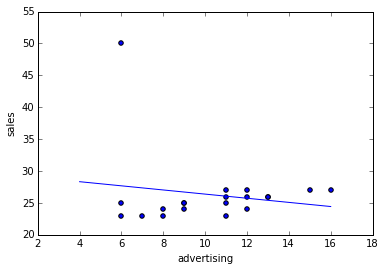

In [7]:
plt.scatter(x=data.adv, y=data.sales)
x_new = pd.Series([4, 16])
plt.plot(x_new, model.predict(x=x_new))

plt.ylabel('sales')
plt.xlabel('advertising')
plt.show()

**(c)** Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?

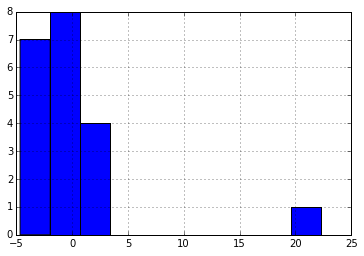

In [8]:
model.resid.hist()
plt.show()

> Doesn't look very normal

Apparently, the regression result of part **(b)** is not satisfactory. Once you realize that the large residual
corresponds to the week with opening hours during the evening, how would you proceed to get a more
satisfactory regression model?

> Remove the outlier

**(d)** Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients $a$ and
$b$ in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also
compute the standard error and $t$-value of $b$. Is $b$ significantly different from 0?

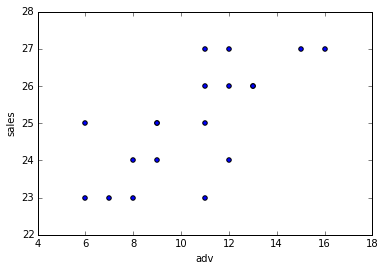

In [9]:
data_cleaned = data[data.sales < 45]
data_cleaned.plot(kind='scatter', x='adv', y='sales')
plt.show()

In [10]:
model = ols(y=data_cleaned.sales, x=data_cleaned.adv)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         19
Number of Degrees of Freedom:   2

R-squared:         0.5154
Adj R-squared:     0.4869

Rmse:              1.0537

F-stat (1, 17):    18.0784, p-value:     0.0005

Degrees of Freedom: model 1, resid 17

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.3750     0.0882       4.25     0.0005     0.2021     0.5479
     intercept    21.1250     0.9548      22.12     0.0000    19.2535    22.9965
---------------------------------End of Summary---------------------------------

> Now $b \ne 0$ with $p = 0.0005$